In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ccdf = pd.read_csv("CustomerChurnData.csv")

In [4]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
ccdf.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [6]:
ccdf.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175,Mobile


In [7]:
ccdf.describe(include='all')

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.00000,11260.000000,11158,11148.000000,11158.000000,11151,11152,11162.000000,11148,11163,11144.000000,11048,11158,10903.000000,11260,11260,10903,10789,11039
unique,NaN,NaN,38,NaN,NaN,5,4,NaN,7,7,NaN,3,59,NaN,20,20,24,321,3
top,NaN,NaN,1,NaN,NaN,Debit Card,Male,NaN,4,Super,NaN,Married,3,NaN,14,1,3,152,Mobile
freq,NaN,NaN,1351,NaN,NaN,4587,6328,NaN,4569,4062,NaN,5860,1746,NaN,1524,4373,1816,208,7482
mean,25629.50000,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,3250.62635,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,20000.00000,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,22814.75000,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,25629.50000,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,28444.25000,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
ccdf.drop('AccountID',axis=1,inplace=True)

In [9]:
ccdf['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [10]:
ccdf['Tenure'].replace('#',3,inplace=True)
ccdf['Tenure']= ccdf['Tenure'].astype(float)

In [11]:
ccdf['Tenure'].fillna(0,inplace=True)

In [12]:
ccdf['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [13]:

ccdf['City_Tier']=ccdf['City_Tier'].astype(float)

In [14]:
ccdf['CC_Contacted_LY'].fillna(17.0,inplace=True)

In [15]:
ccdf['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [16]:
ccdf['Payment'].fillna('Cash on Delivery',inplace=True)
ccdf['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [17]:
ccdf['Gender']=ccdf['Gender'].replace({"M":"Male","F":"Female"})

In [18]:
ccdf['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [19]:
ccdf['Service_Score'].fillna(3.0,inplace=True)

In [20]:
ccdf['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [21]:
ccdf['Account_user_count'].replace("@",2,inplace=True)
ccdf['Account_user_count'].fillna(1,inplace=True)

In [22]:
ccdf['Account_user_count']=ccdf['Account_user_count'].astype(int)

In [23]:
ccdf['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [24]:
ccdf['account_segment'].replace({"Regular +":"Regular Plus","Super +":"Super Plus"},inplace=True)

In [25]:
ccdf['account_segment'].fillna("Regular Plus",inplace=True)

In [26]:
ccdf['CC_Agent_Score'].fillna(3,inplace=True)

In [27]:
ccdf['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [28]:
ccdf['rev_growth_yoy'].replace('$',4,inplace=True)
ccdf['rev_growth_yoy']=ccdf['rev_growth_yoy'].astype(float)

In [29]:
ccdf['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [30]:
ccdf['rev_per_month'].replace('+',np.NaN,inplace=True)

In [31]:
ccdf['rev_per_month']=ccdf['rev_per_month'].astype(float)

In [32]:
ccdf['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [33]:
ccdf['coupon_used_for_payment']=ccdf['coupon_used_for_payment'].replace({'#':3,'$':4,'*':8})

In [34]:
ccdf['coupon_used_for_payment']=ccdf['coupon_used_for_payment'].astype(float)

In [35]:
ccdf['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [36]:
ccdf['Day_Since_CC_connect'].replace('$',4,inplace=True)
ccdf['Day_Since_CC_connect']=ccdf['Day_Since_CC_connect'].astype(float)

In [37]:
ccdf['cashback'].replace('$',4,inplace=True)
ccdf['cashback']=ccdf['cashback'].astype(float)

In [38]:
ccdf['Login_device'].replace("&&&&",'otherdevice',inplace=True)
ccdf['Login_device'].fillna('otherdevice',inplace=True)

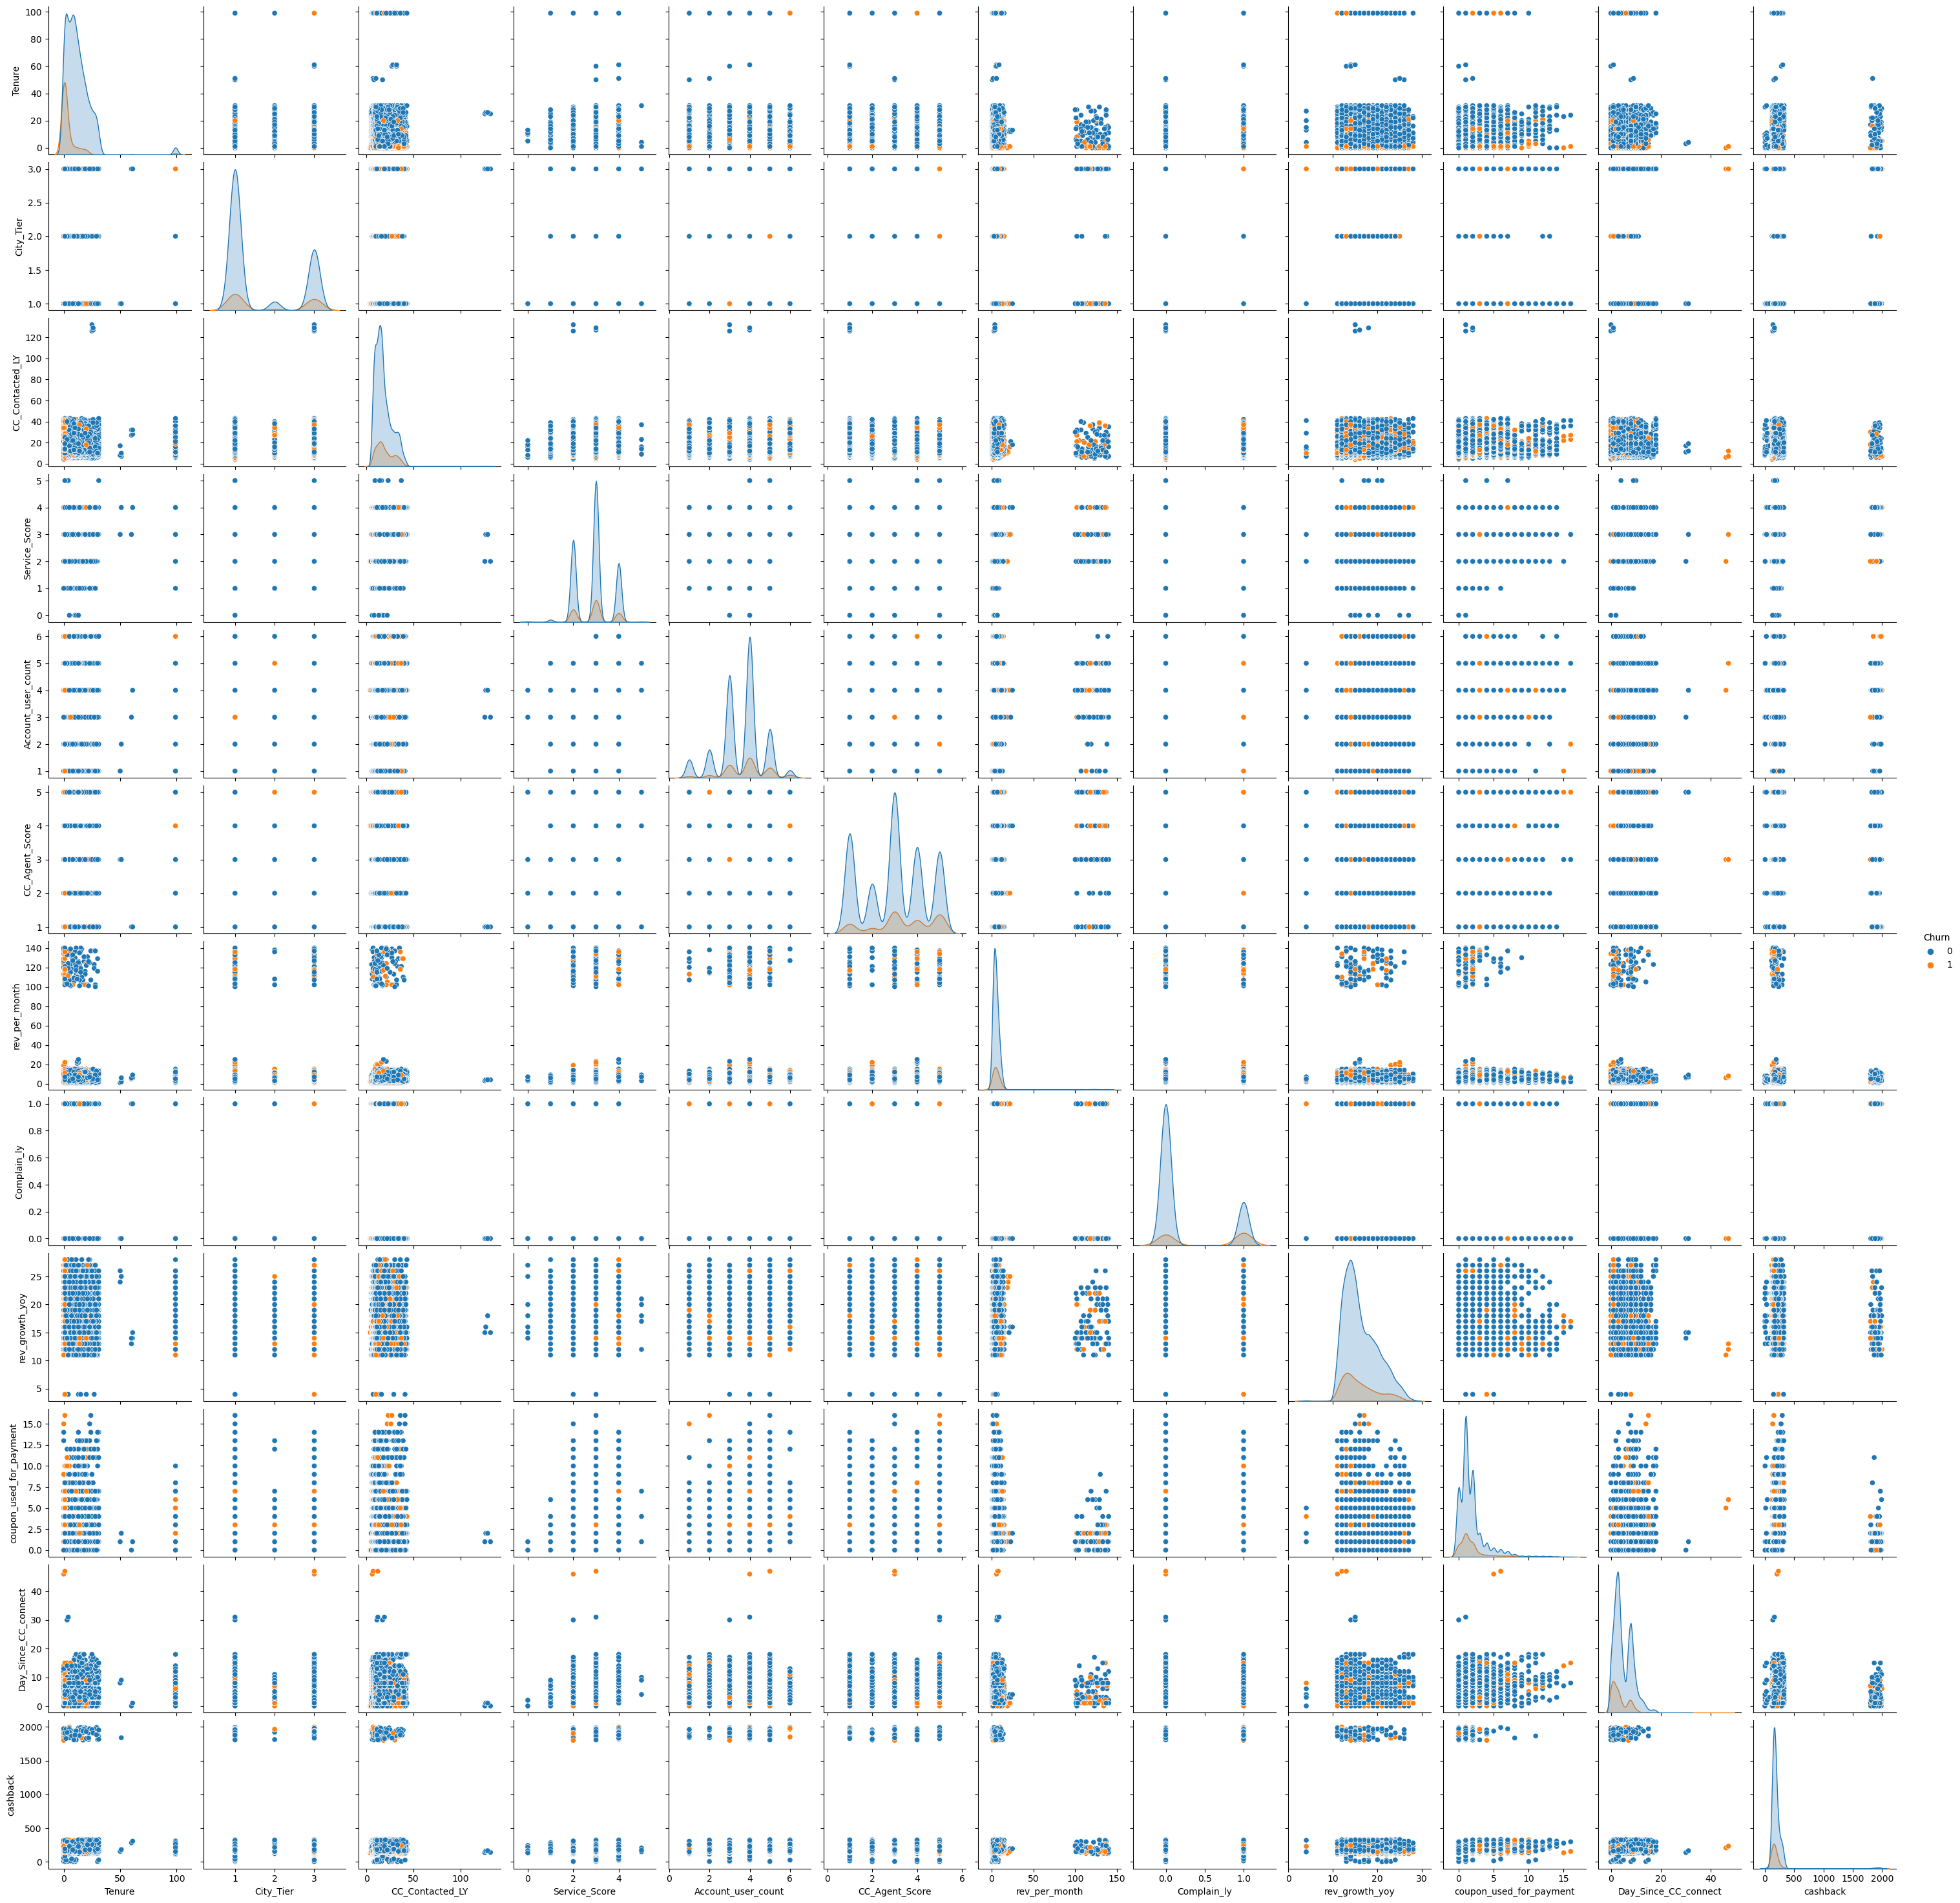

In [39]:
sns.pairplot(data=ccdf,hue='Churn',diag_kind='kde')

<AxesSubplot:xlabel='Churn', ylabel='count'>

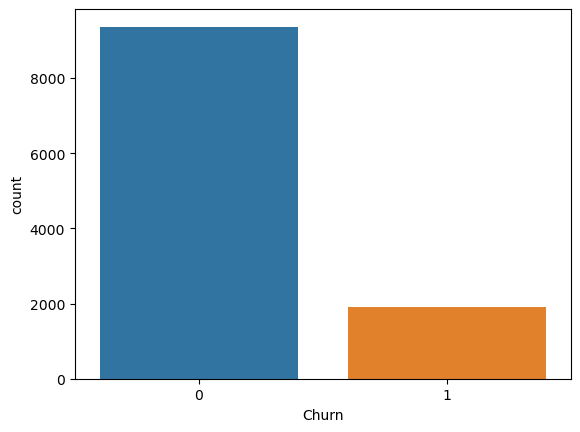

In [40]:
sns.countplot(data=ccdf,x='Churn')

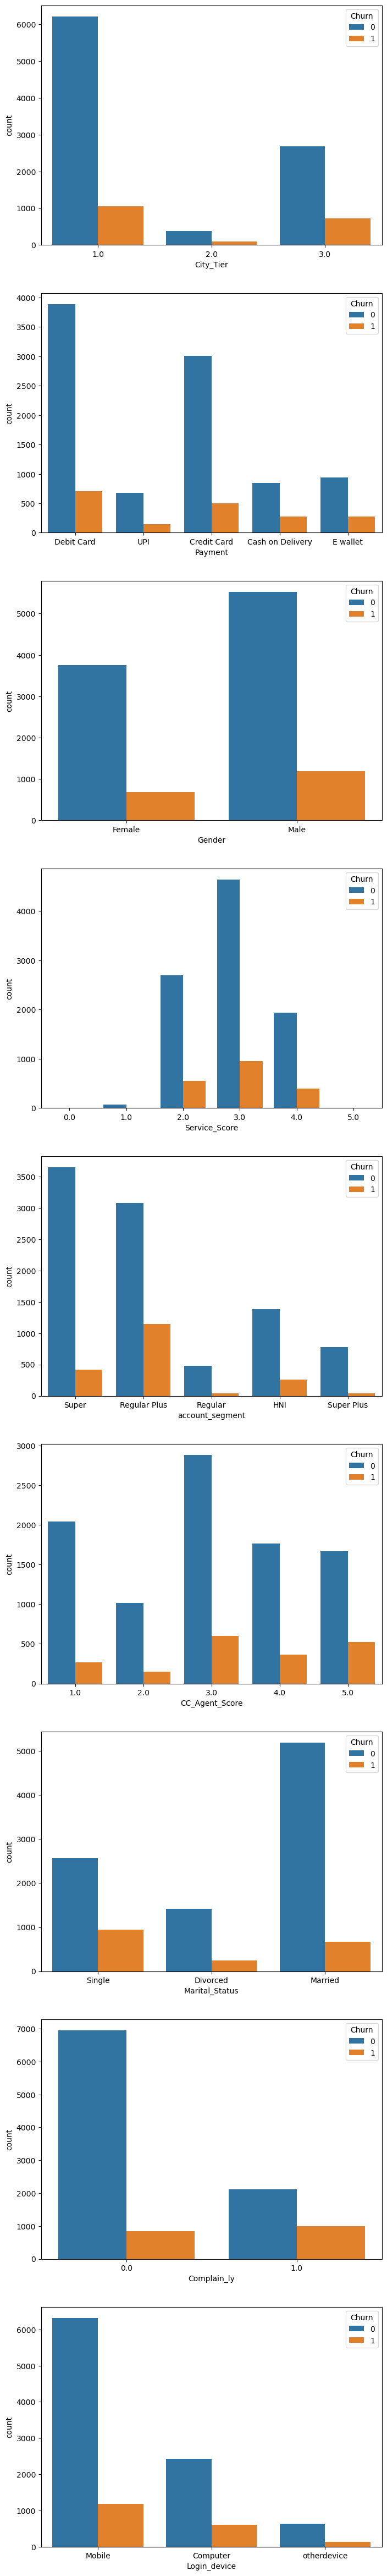

In [41]:
mylist = ['City_Tier', 'Payment', 'Gender',
       'Service_Score', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
plt.figure(figsize=(8,60))
for i in range(9):
    plt.subplot(9,1,i+1)
    sns.countplot(data=ccdf,x=mylist[i],hue='Churn')
    
plt.savefig("bivariate.png")

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

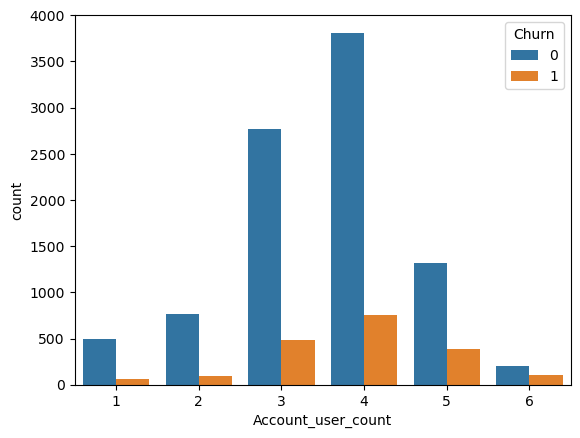

In [42]:
sns.countplot(data=ccdf,x='Account_user_count',hue='Churn')

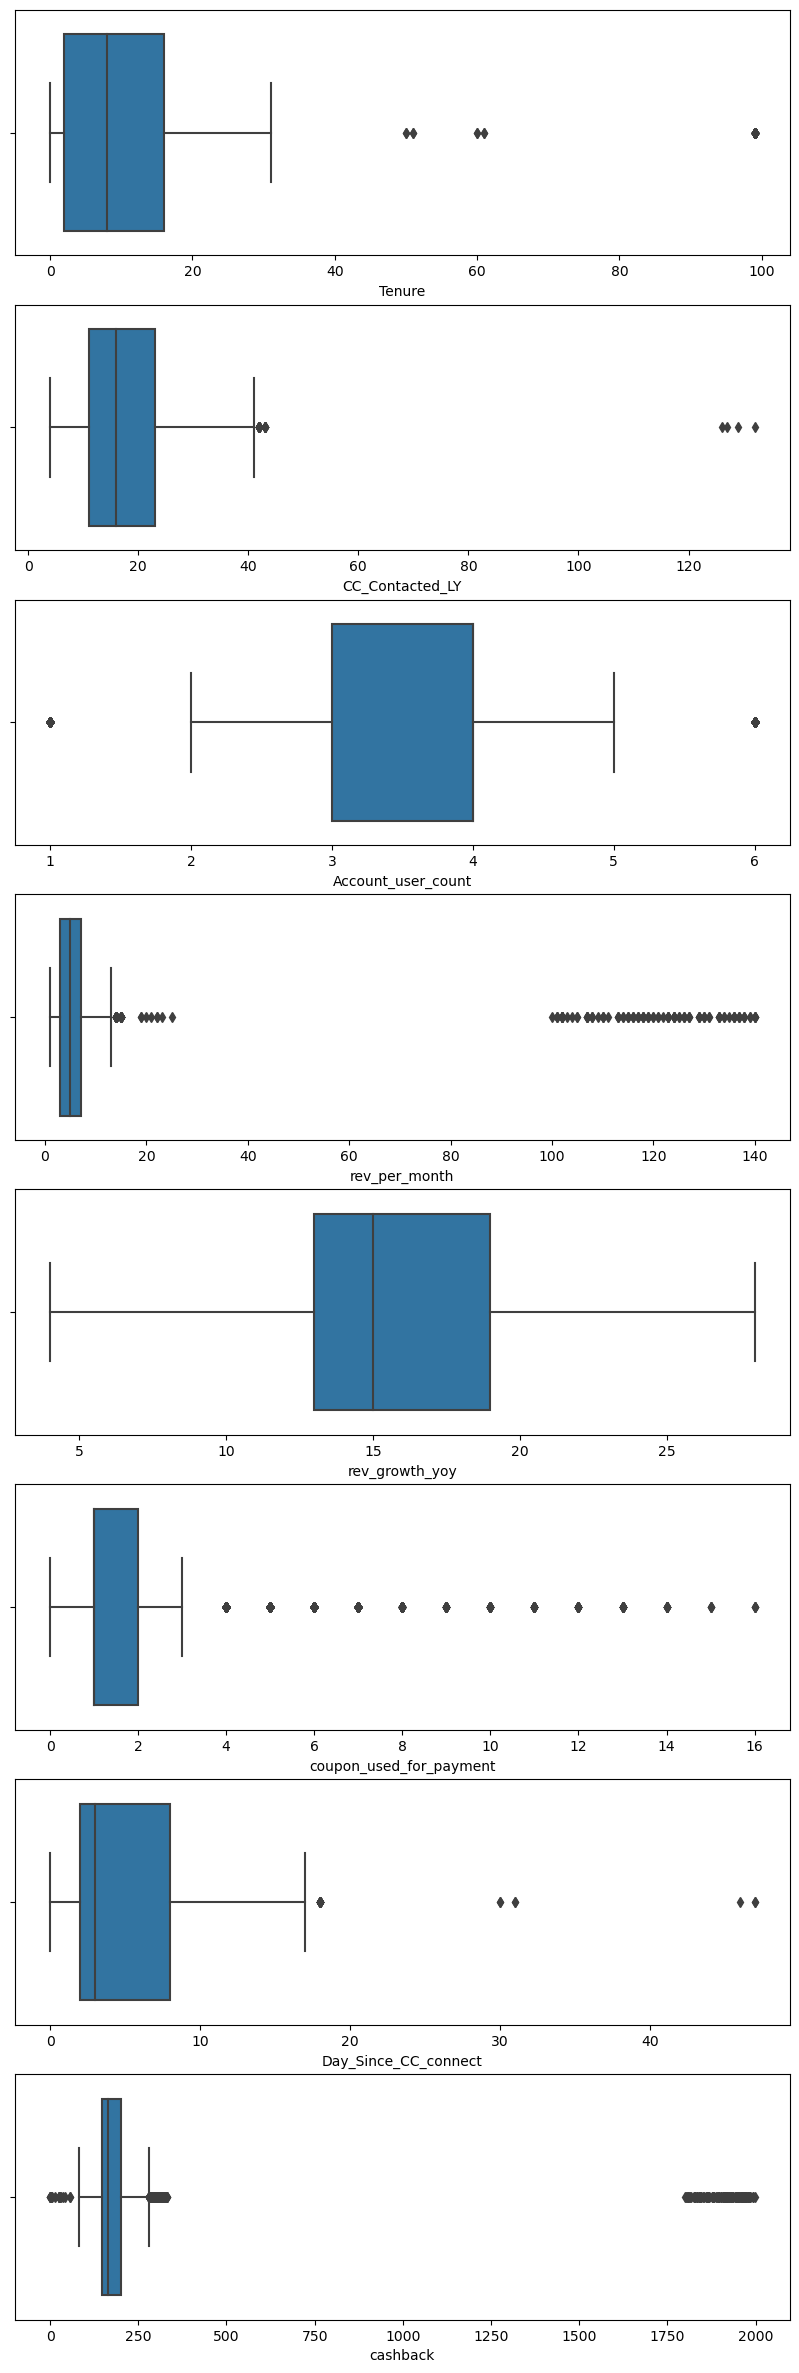

In [43]:
mylist=['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback']
plt.figure(figsize=(10,30))
for i in range(8):
    plt.subplot(8,1,i+1)
    sns.boxplot(data=ccdf,x=mylist[i])
    
plt.savefig("boxplot.png")

<AxesSubplot:xlabel='Payment', ylabel='count'>

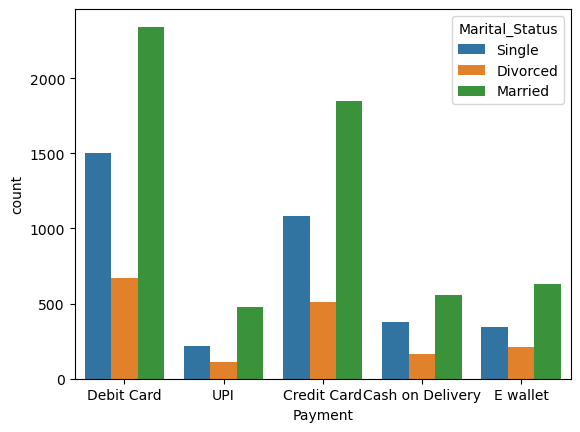

In [44]:
sns.countplot(data=ccdf,x='Payment',hue='Marital_Status')

In [45]:
ccdf.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11148.000000,11260.000000,11260.000000,11260.000000,11260.000000,10469.000000,10903.000000,11260.000000,11260.000000,10903.000000,10789.00000
mean,0.168384,10.842540,1.653929,17.859236,2.903375,3.616163,3.065808,6.362594,0.285334,16.190142,1.791474,4.633128,196.19974
std,0.374223,12.822176,0.915015,8.813458,0.722476,1.075160,1.372663,11.909686,0.451594,3.762487,1.970300,3.697472,178.65949
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.00000
50%,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.00000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.00000
max,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.00000


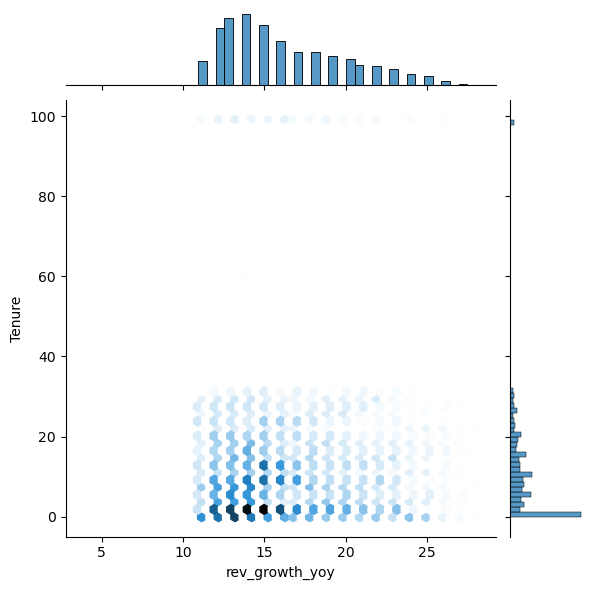

In [46]:
sns.jointplot(data=ccdf,x='rev_growth_yoy',y='Tenure',kind='hex')

<AxesSubplot:>

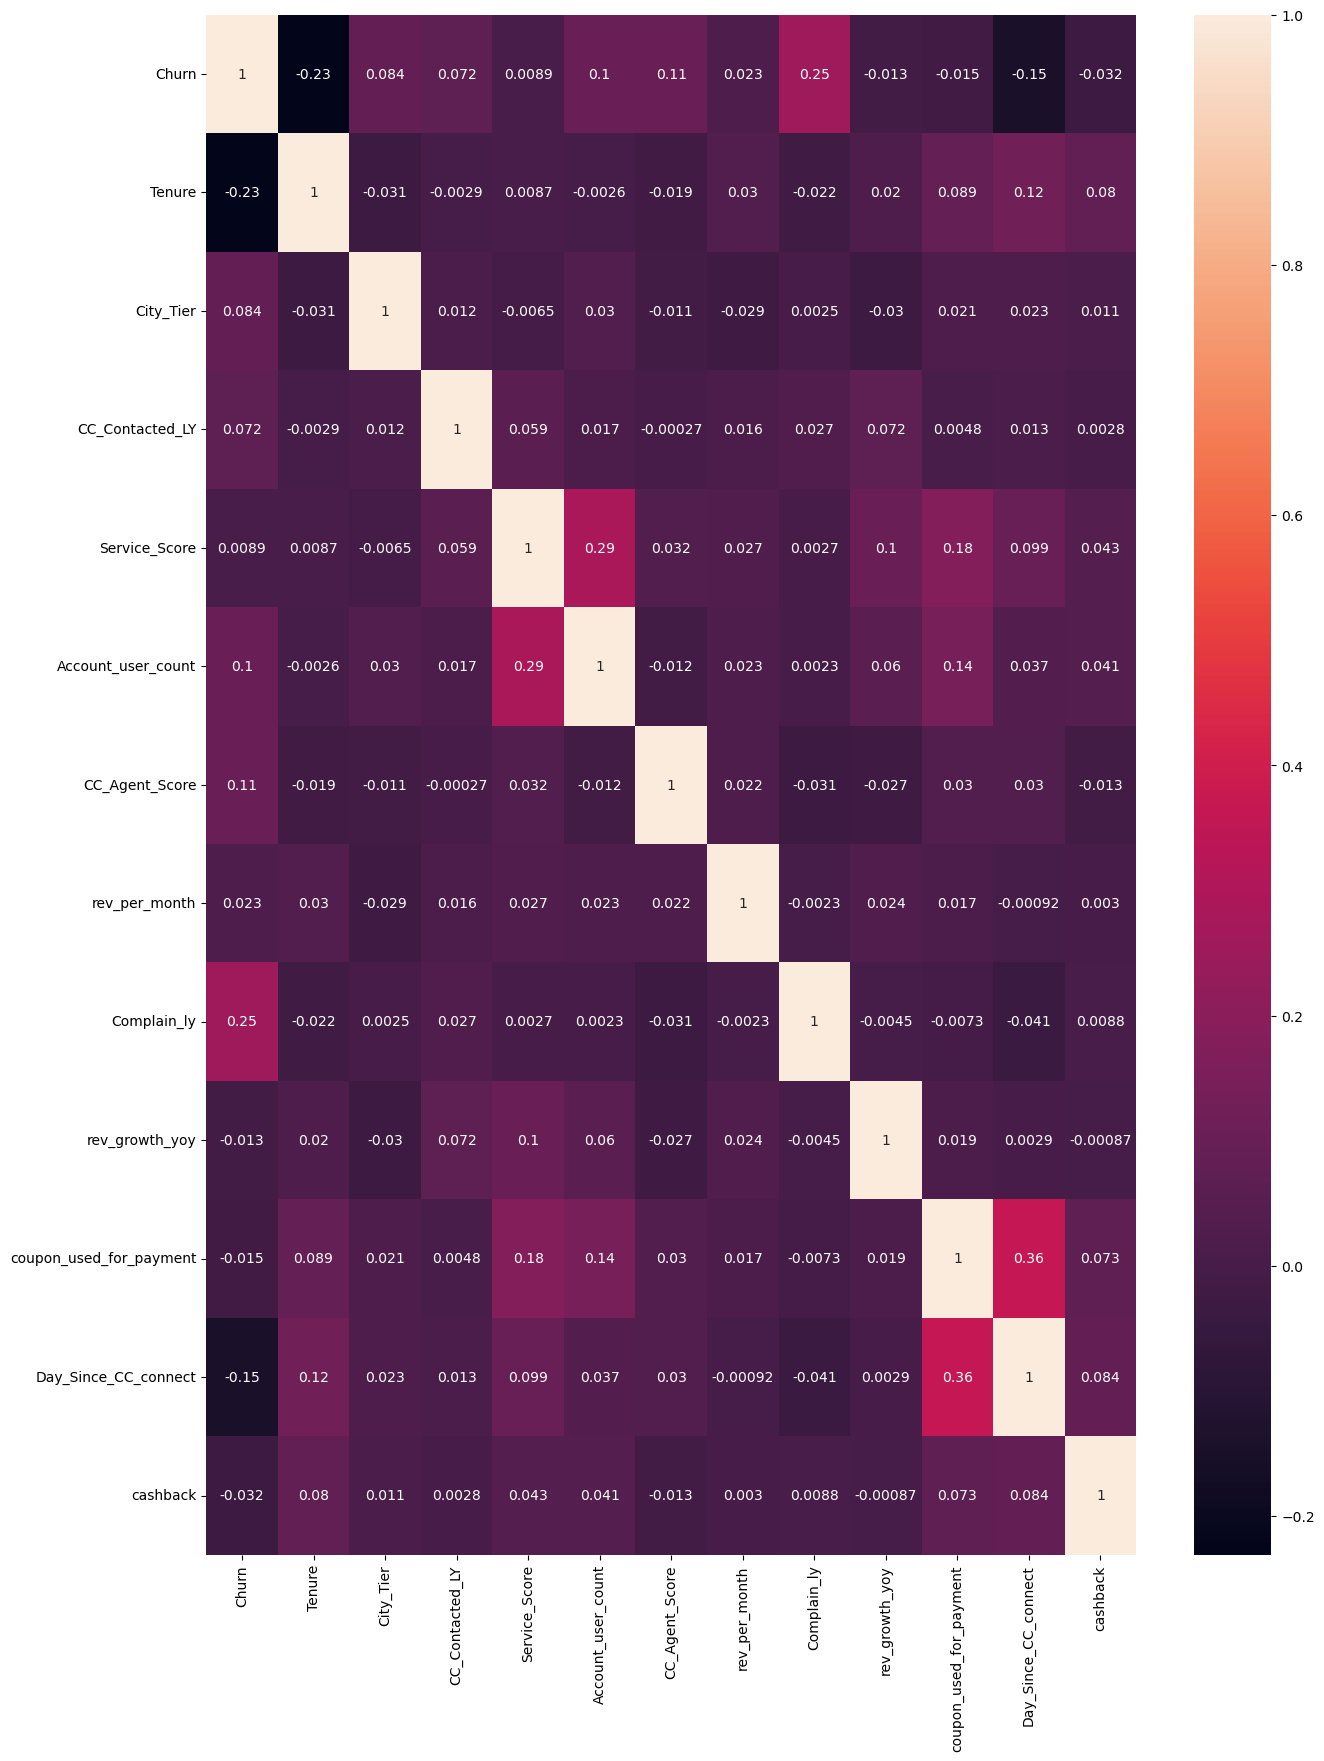

In [47]:
plt.figure(figsize=(15,20))
sns.heatmap(data=ccdf.corr(),annot=True)

In [48]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int32  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [49]:
ccdf.drop(['rev_per_month','rev_growth_yoy','coupon_used_for_payment','cashback'],axis=1,inplace=True)

In [50]:
ccdf.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,Complain_ly,Day_Since_CC_connect
count,11260.000000,11260.000000,11148.000000,11260.000000,11260.000000,11260.000000,11260.000000,10903.000000,10903.000000
mean,0.168384,10.842540,1.653929,17.859236,2.903375,3.616163,3.065808,0.285334,4.633128
std,0.374223,12.822176,0.915015,8.813458,0.722476,1.075160,1.372663,0.451594,3.697472
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,0.000000,3.000000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,1.000000,8.000000
max,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,1.000000,47.000000


In [51]:
q3=16
q1=8
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
ccdf['Tenure']=ccdf['Tenure'].apply(lambda x:upperlimit if x>upperlimit else (lowerlimit if x< lowerlimit else x))

<AxesSubplot:xlabel='Tenure'>

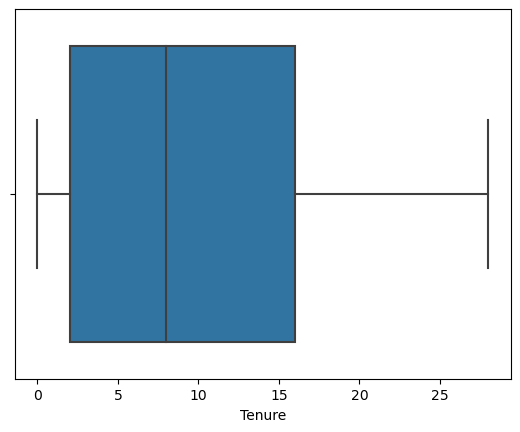

In [52]:
sns.boxplot(data=ccdf, x='Tenure')

In [53]:
q3=23
q1=11
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
ccdf['CC_Contacted_LY']=ccdf['CC_Contacted_LY'].apply(lambda x:upperlimit if x>upperlimit else (lowerlimit if x< lowerlimit else x))

<AxesSubplot:xlabel='CC_Contacted_LY'>

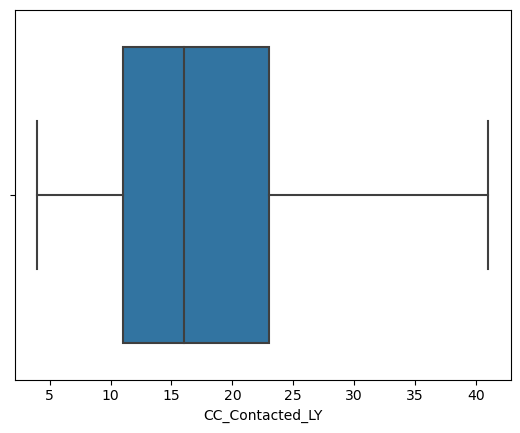

In [54]:
ccdf['CC_Contacted_LY'].fillna(ccdf['CC_Contacted_LY'].median(),inplace=True)
sns.boxplot(data=ccdf,x='CC_Contacted_LY')

In [55]:
ccdf['City_Tier'].fillna(1,inplace=True)

In [56]:
ccdf['Complain_ly'].fillna(0,inplace=True)

In [57]:
ccdf['Gender'].fillna('Male',inplace=True)

In [58]:
ccdf['Marital_Status'].fillna('Single',inplace=True)

In [59]:
q3=7
q1=2
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
ccdf['Day_Since_CC_connect']=ccdf['Day_Since_CC_connect'].apply(lambda x:upperlimit if x>upperlimit else (lowerlimit if x< lowerlimit else x))
ccdf['Day_Since_CC_connect'].fillna(ccdf["Day_Since_CC_connect"].median(),inplace=True)

<AxesSubplot:xlabel='Day_Since_CC_connect'>

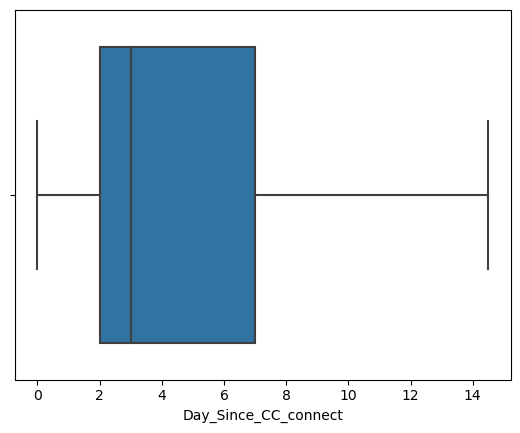

In [60]:
sns.boxplot(data=ccdf,x='Day_Since_CC_connect')

In [61]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 11260 non-null  int64  
 1   Tenure                11260 non-null  float64
 2   City_Tier             11260 non-null  float64
 3   CC_Contacted_LY       11260 non-null  float64
 4   Payment               11260 non-null  object 
 5   Gender                11260 non-null  object 
 6   Service_Score         11260 non-null  float64
 7   Account_user_count    11260 non-null  int32  
 8   account_segment       11260 non-null  object 
 9   CC_Agent_Score        11260 non-null  float64
 10  Marital_Status        11260 non-null  object 
 11  Complain_ly           11260 non-null  float64
 12  Day_Since_CC_connect  11260 non-null  float64
 13  Login_device          11260 non-null  object 
dtypes: float64(7), int32(1), int64(1), object(5)
memory usage: 1.2+ MB


In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le=LabelEncoder()
m = MinMaxScaler()

In [63]:
ccdf['Gender']=le.fit_transform(ccdf['Gender'])
ccdf['Marital_Status']=le.fit_transform(ccdf['Marital_Status'])
ccdf['Payment']=le.fit_transform(ccdf['Payment'])
ccdf['account_segment']=le.fit_transform(ccdf['account_segment'])
ccdf['Login_device']=le.fit_transform(ccdf['Login_device'])

In [64]:
ccdf.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Day_Since_CC_connect,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3,3,2.0,2,1.0,5.0,1
1,1,0.0,1.0,8.0,4,1,3.0,4,2,3.0,2,1.0,0.0,1
2,1,0.0,1.0,30.0,2,1,2.0,4,2,3.0,2,1.0,3.0,1
3,1,0.0,3.0,15.0,2,1,2.0,4,3,5.0,2,0.0,3.0,1
4,1,0.0,1.0,12.0,1,1,2.0,3,2,5.0,2,0.0,3.0,1


In [65]:
cdf=pd.DataFrame(m.fit_transform(ccdf),columns = ccdf.columns)

In [66]:
cdf

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Day_Since_CC_connect,Login_device
0,1.0,0.142857,1.0,0.054054,0.50,0.0,0.6,0.4,0.75,0.25,1.0,1.0,0.344828,0.5
1,1.0,0.000000,0.0,0.108108,1.00,1.0,0.6,0.6,0.50,0.50,1.0,1.0,0.000000,0.5
2,1.0,0.000000,0.0,0.702703,0.50,1.0,0.4,0.6,0.50,0.50,1.0,1.0,0.206897,0.5
3,1.0,0.000000,1.0,0.297297,0.50,1.0,0.4,0.6,0.75,1.00,1.0,0.0,0.206897,0.5
4,1.0,0.000000,0.0,0.216216,0.25,1.0,0.4,0.4,0.50,1.00,1.0,0.0,0.206897,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,0.357143,0.0,0.810811,0.25,1.0,0.6,0.2,0.75,0.00,0.5,0.0,0.275862,0.0
11256,0.0,0.464286,0.0,0.405405,0.25,1.0,0.6,0.8,0.00,1.00,0.5,0.0,0.551724,0.5
11257,0.0,0.035714,0.0,0.270270,0.50,1.0,0.6,0.2,0.75,0.75,0.5,1.0,0.275862,0.5
11258,0.0,0.821429,1.0,0.189189,0.25,1.0,0.8,0.8,0.75,0.75,0.5,0.0,0.620690,0.0


In [67]:
from sklearn.model_selection import train_test_split
x = ccdf.drop("Churn",axis=1)
y =ccdf["Churn"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=20)

In [68]:
y_train.value_counts()

0    6547
1    1335
Name: Churn, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm = SMOTE(random_state=30)

In [71]:
x_res,y_res = sm.fit_resample(x_train,y_train)

In [72]:
y_res.value_counts()

0    6547
1    6547
Name: Churn, dtype: int64

In [73]:
print("xshape",x_train.shape)
print("oversampling",x_res.shape)

xshape (7882, 13)
oversampling (13094, 13)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [75]:
lr = LogisticRegression()
lr.fit(x_res,y_res)
y_predlr = lr.predict(x_test)

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
lr.score(x_test,y_test)

0.7676139727649497

In [77]:
def print_report(pred):
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(accuracy_score(y_test,pred))

print_report(y_predlr)

[[2180  637]
 [ 148  413]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2817
           1       0.39      0.74      0.51       561

    accuracy                           0.77      3378
   macro avg       0.66      0.76      0.68      3378
weighted avg       0.85      0.77      0.79      3378

0.7676139727649497


In [78]:
nbmodel = GaussianNB()
nbmodel.fit(x_res,y_res)
y_prednb = nbmodel.predict(x_test)

In [79]:
nbmodel.score(x_res,y_res)

0.7784481441881778

In [80]:
print_report(y_prednb)

[[2010  807]
 [ 133  428]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2817
           1       0.35      0.76      0.48       561

    accuracy                           0.72      3378
   macro avg       0.64      0.74      0.64      3378
weighted avg       0.84      0.72      0.76      3378

0.7217288336293665


In [81]:
msv = SVC(C=10)
msv.fit(x_res,y_res)
y_predsv = msv.predict(x_test)

In [82]:
msv.score(x_test,y_test)

0.8348134991119005

In [83]:
print_report(y_predsv)

[[2393  424]
 [ 134  427]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2817
           1       0.50      0.76      0.60       561

    accuracy                           0.83      3378
   macro avg       0.72      0.81      0.75      3378
weighted avg       0.87      0.83      0.85      3378

0.8348134991119005


In [84]:
mdt = DecisionTreeClassifier(criterion='entropy',splitter="random",max_depth=25)
mdt.fit(x_res,y_res)
y_preddt = mdt.predict(x_test)

In [85]:
mdt.score(x_test,y_test)

0.9505624629958556

In [86]:
print_report(y_preddt)

[[2715  102]
 [  65  496]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2817
           1       0.83      0.88      0.86       561

    accuracy                           0.95      3378
   macro avg       0.90      0.92      0.91      3378
weighted avg       0.95      0.95      0.95      3378

0.9505624629958556


In [87]:
mrf = RandomForestClassifier(n_estimators=140,max_depth=25,criterion='entropy')
mrf.fit(x_res,y_res)
y_predrf = mrf.predict(x_test)

In [88]:
mrf.score(x_test,y_test)

0.9742451154529307

In [89]:
print_report(y_predrf)

[[2776   41]
 [  46  515]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2817
           1       0.93      0.92      0.92       561

    accuracy                           0.97      3378
   macro avg       0.95      0.95      0.95      3378
weighted avg       0.97      0.97      0.97      3378

0.9742451154529307


In [90]:
mkn = KNeighborsClassifier(n_neighbors=10,p=1)
mkn.fit(x_res,y_res)
y_predkn = mkn.predict(x_test)

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [91]:
mkn.score(x_test,y_test)

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8913558318531676

In [92]:
print_report(y_predkn)

[[2490  327]
 [  40  521]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2817
           1       0.61      0.93      0.74       561

    accuracy                           0.89      3378
   macro avg       0.80      0.91      0.84      3378
weighted avg       0.92      0.89      0.90      3378

0.8913558318531676


In [93]:
ccdf['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64